In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [-5.07, -2.56, -10.72, 6.07, 22, 27.69, 0.72, 3.87, -1.06, 18.77]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,-5.07
1,London,51.5085,-2.56
2,Oslo,59.9127,-10.72
3,Beijing,39.9075,6.07
4,Mumbai,19.0144,22.00
5,Manila,14.6042,27.69
6,New York,40.7143,0.72
7,Seattle,47.6062,3.87
8,Dallas,32.7668,-1.06
9,Taipei,25.0478,18.77


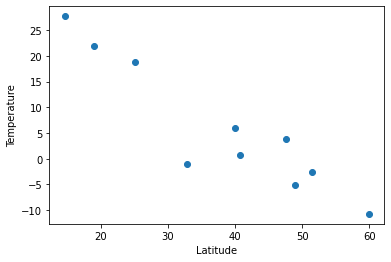

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    -2.646601
1    -4.753504
2   -11.422495
3     4.452246
4    21.031563
5    24.531192
6     3.812025
7    -1.656909
8    10.118611
9    16.243874
Name: lat, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.79x +36.12


The r-value is: 0.8644512631284795


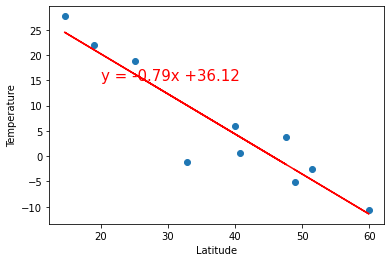

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 1.39.


In [10]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 7.36


In [11]:
import gmaps
import pandas as pd

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [12]:
# Create aiport dataframe
airport_df = pd.read_csv('Resources/Airport_Output.csv')
airport_df.dropna(inplace = True) 
airport_df.head()

,Unnamed: 0,City,State,Lat,Lng,Airport Name,Airport Address,Airport Rating
0,0,New York City,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2
1,1,Los Angeles,California,34.052234,-118.243685,Los Angeles International Airport,"1 World Way, Los Angeles",3.5
2,2,Chicago,Illinois,41.878114,-87.629798,O'Hare International Airport,"10000 W O'Hare Ave, Chicago",3.6
3,3,Houston,Texas,29.760427,-95.369803,William P. Hobby Airport,"7800 Airport Blvd, Houston",4.0
4,4,Philadelphia,Pennsylvania,39.952584,-75.165222,Philadelphia International Airport,"8000 Essington Ave, Philadelphia",3.3


In [13]:
# Store latitude and longitude in locations
locations = airport_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
rating = airport_df["Airport Rating"].astype(float)

In [17]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
# BONUS
# Plost as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
# BONUS
# Plot as a Terrain map
fig = gmaps.figure(map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))